<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/test_features/ANAS_NOURI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

## 1. Regression discontinuity: banking recovery



In [34]:

data = pd.read_csv('bank_data.csv')
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


## 2. Graphical exploratory data analysis



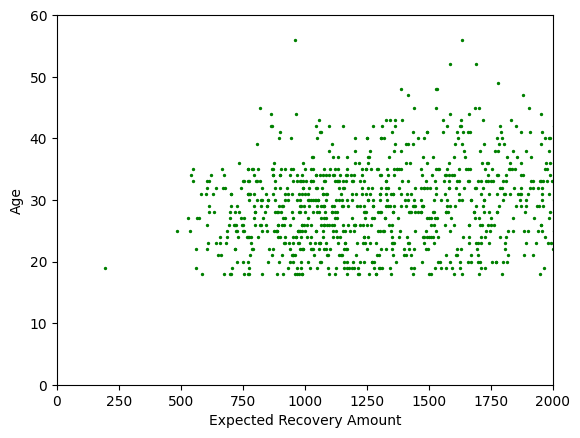

In [35]:
# Scatter plot of Age vs. Expected Recovery Amount
plt.scatter(x=data['expected_recovery_amount'], y=data['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(0, 60)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.show()

## 3. Statistical test:  age vs. expected recovery amount


In [36]:

# Compute average age just below and above the threshold
Expect_900_1100 = data.loc[(data['expected_recovery_amount']<1100) &
                      (data['expected_recovery_amount']>=900)]
b_recovery_strategy = Expect_900_1100.groupby(['recovery_strategy'])
b_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_age = Expect_900_1100.loc[data['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = Expect_900_1100.loc[data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

## 4. Statistical test:  sex vs. expected recovery amount


In [37]:
# Number of customers in each category
cross = pd.crosstab(data.loc[(data['expected_recovery_amount']<2000) &
                              (data['expected_recovery_amount']>=0)]['recovery_strategy'],
                       data['sex'])
print(cross)

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross)
print(p_val)

sex                Female  Male
recovery_strategy              
Level 0 Recovery      108   139
Level 1 Recovery      316   354
0.3941650543686612


## 5. Exploratory graphical analysis: recovery amount


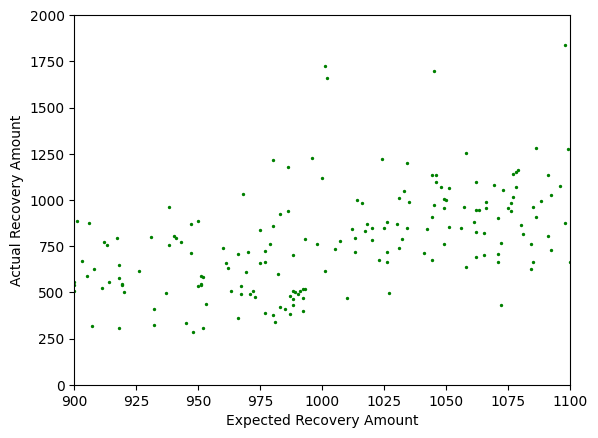

In [38]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount
plt.scatter(x=data['expected_recovery_amount'], y=data['actual_recovery_amount'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.show()

## 6. Statistical analysis:  recovery amount


In [39]:
# Compute average actual recovery amount just below and above the threshold
b_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
Level_0_actual = Expect_900_1100.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = Expect_900_1100.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
print(stats.kruskal(Level_0_actual, Level_1_actual))

# Repeat for a smaller range of $950 to $1050
Expect_950_1050  = data.loc[(data['expected_recovery_amount']<1050) &
                      (data['expected_recovery_amount']>=950)]
Level_0_actual = Expect_950_1050.loc[data['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
Level_1_actual = Expect_950_1050.loc[data['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(Level_0_actual, Level_1_actual)

KruskalResult(statistic=65.37966302528878, pvalue=6.177308752803109e-16)


KruskalResult(statistic=30.246000000000038, pvalue=3.80575314300276e-08)

## 7. Regression modeling: no threshold


In [40]:

X = Expect_900_1100['expected_recovery_amount']
y =Expect_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            17:32:07   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 8. Regression modeling: adding true threshold


In [41]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
data['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = data.loc[(data['expected_recovery_amount']<1100) &
                      (data['expected_recovery_amount']>=900)]

X = Expect_900_1100['expected_recovery_amount']
y = Expect_900_1100['actual_recovery_amount']
X = sm.add_constant(X)
# Build linear regression model
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            17:32:07   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 9. Regression modeling: adjusting the window


In [42]:
# Redefine era_950_1050 so the indicator variable is included
Expect_950_1050 = data.loc[(data['expected_recovery_amount']<1050) &
                      (data['expected_recovery_amount']>=950)]


X = Expect_950_1050[['expected_recovery_amount','indicator_1000']]
y = Expect_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Tue, 25 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            17:32:07   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""